<a href="https://colab.research.google.com/github/Aimanehi/Python_projects/blob/main/Geely_Autos_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Overview

A Chinese automobile company Geely Auto aspires to enter the Nigerian
market by setting up its manufacturing unit and producing cars locally to
compete with their Nigerian, US and European counterparts.
They have contacted you, a Data Scientist to understand the factors on which
the pricing of cars depends. Specifically, they want to understand the factors
affecting the pricing of cars in the Nigerian market, since those may be very
different from the Chinese market.

The company wants to know:
* Which variables are significant in predicting the price of a
car.
* How well do those variables describe the price of a car.

Based on various market surveys, you have gathered a large data set of
different types of cars across the Nigerian market.

# Business Goal (Objective)

You are required to explore the Dataset, and come up with
insights that will aid the management to understand how
exactly the prices vary with the independent variables.
They can accordingly manipulate the design of the cars,
the business strategy etc. to meet certain price levels.
This Exploration will be a good way for management to
understand the pricing dynamics of a new market.

Best Practices for EDA:

The final notebook should be well-documented,
with inline comments explaining the functionality
of code and markdown cells containing comments
on the observations and insights.

In [ ]:
#import dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

EXPLORATORY DATA ANALYSIS

In [ ]:
# df = pd.read_csv('CarPrice_data.csv')
df = pd.read_csv('/content/CarPrice_data.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


UNIVARIATE ANALYSIS

<Axes: xlabel='price', ylabel='Count'>

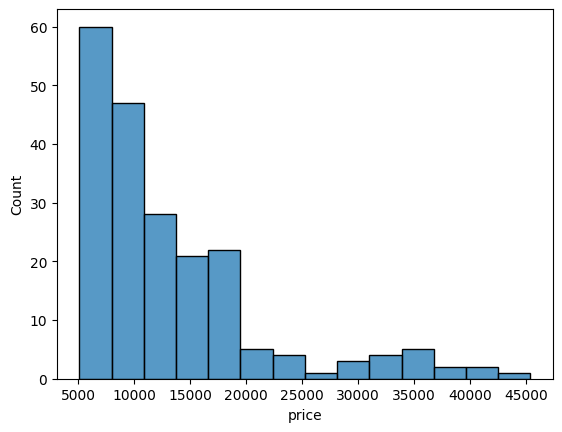

In [ ]:
# univariate distribution of the price
sb.histplot(df['price'])

- We observe that the distribution of the car is not normal, it is positively skewed distribution. 
- The highest number of cars falls between price range 5000 to 20000
- Most expensive cars are not up to 10 in the datasets

<Axes: xlabel='fueltype', ylabel='count'>

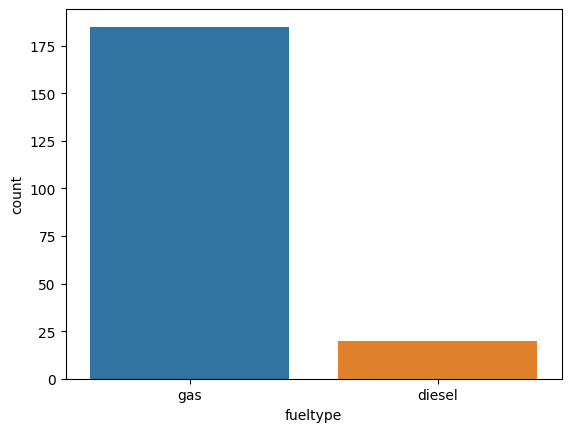

In [ ]:
# univariate distribution of the car fuel type

sb.countplot(x='fueltype', data=df)

- Most of the car run on gas fuel type
- The cars that runs on diesel are not upto 25


<Axes: xlabel='enginetype', ylabel='count'>

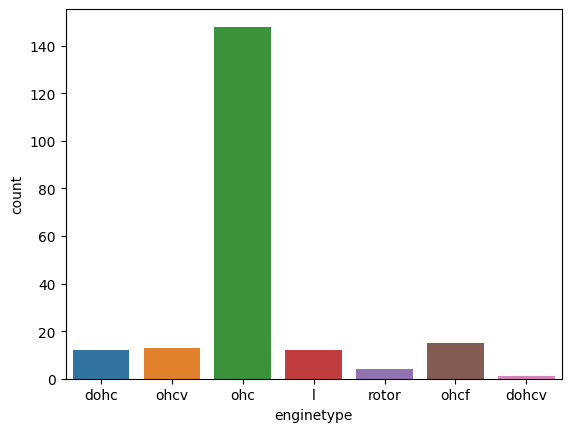

In [ ]:
# univariate distribution of Engine type

sb.countplot(x='enginetype', data=df)

- Most of the cars run on OHC Engines which is above 140.

<Axes: xlabel='carbody', ylabel='count'>

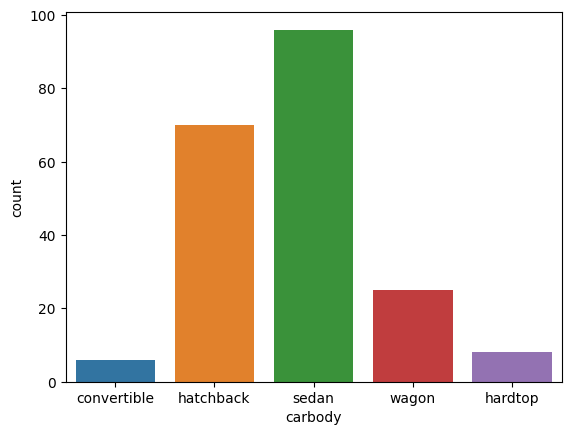

In [ ]:
# distribution of the car body

sb.countplot(x='carbody', data=df)


- We observed that most of the cars have sedan carbody followed by hatchbak, wagon then hardtop and convertibles.

BIVARIATE ANALYSIS

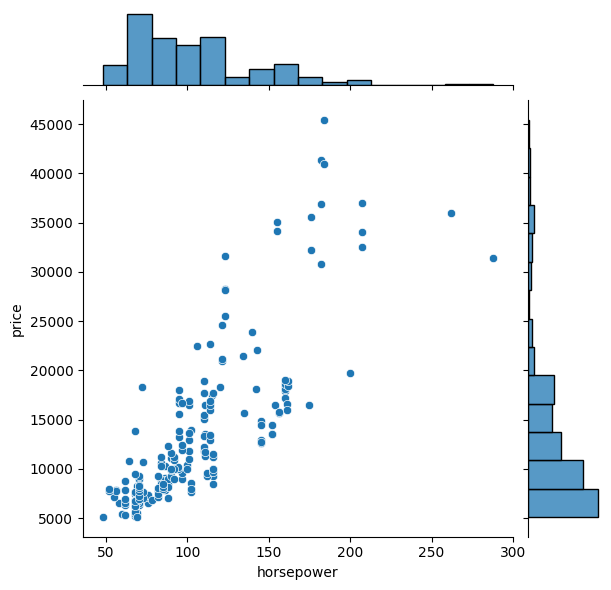

In [ ]:
sb.jointplot(x='horsepower', y='price', data=df)

- We observed that the higher the horsepower the higher the price.
- There is a positive correlation between the horsepower and our dependant variable.
- Horsepower feature is fairly symetrical, do we can detect a number of outliers

<Axes: xlabel='enginelocation', ylabel='price'>

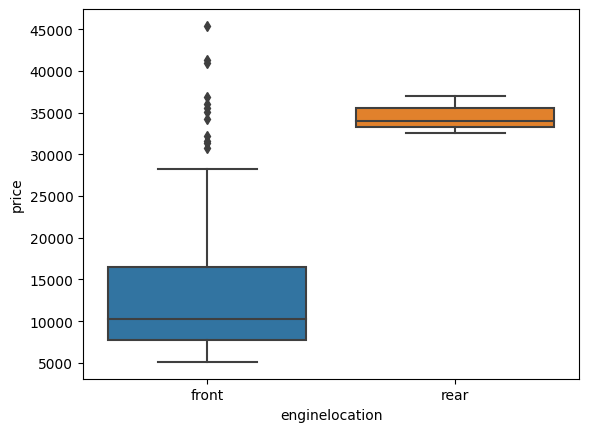

In [ ]:
# relationship between engine location and price

sb.boxplot(x='enginelocation', y='price', data=df)

- We can observe that on average less expensive car have their engines in the front of the car though we detect the presence of outlier
- We can observe that all cars that have engines located at the rear are on an average more expensive than the with engine in the front.

<Axes: xlabel='enginelocation', ylabel='enginesize'>

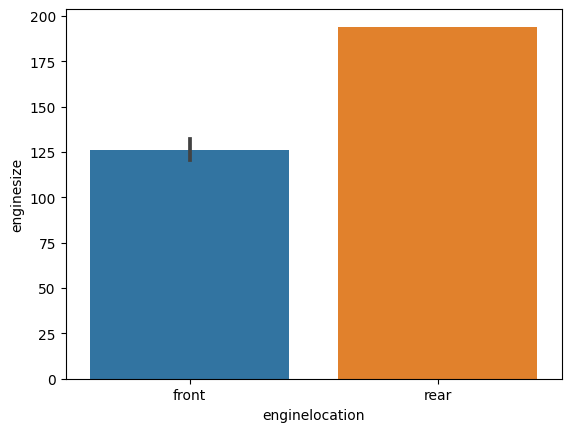

In [ ]:
sb.barplot(x='enginelocation', y='enginesize', data=df)

- We can observe the data set that rear engined cars tend to be larger in size than frong engine cars 

<Axes: xlabel='enginetype', ylabel='highwaympg'>

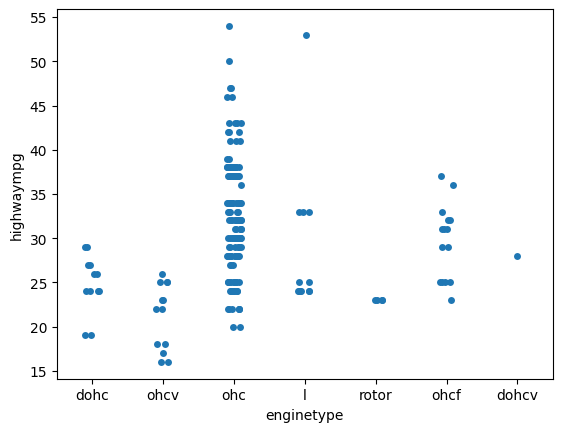

In [ ]:
# relationship between highwaympg and engine type

sb.stripplot(x='enginetype',y='highwaympg', data=df)

- We can observe that ohc engine on average has a higher mpg 

<Axes: xlabel='carbody', ylabel='price'>

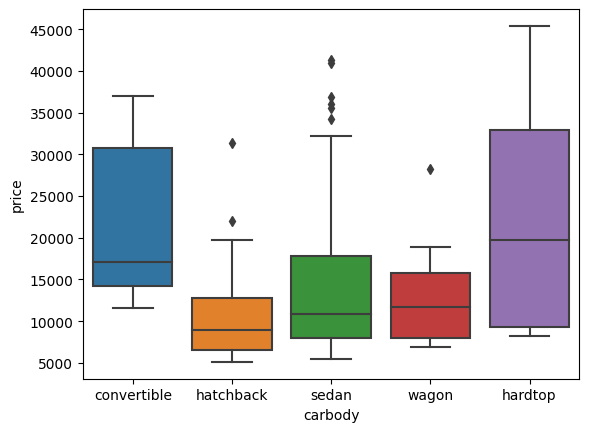

In [ ]:
# relationship between car body and price

sb.boxplot(x='carbody', y='price', data=df)

- We can obaerve that an average hardtop and covertible cars tend to be more expensive


Multivariate Analysis

<Axes: xlabel='carbody', ylabel='price'>

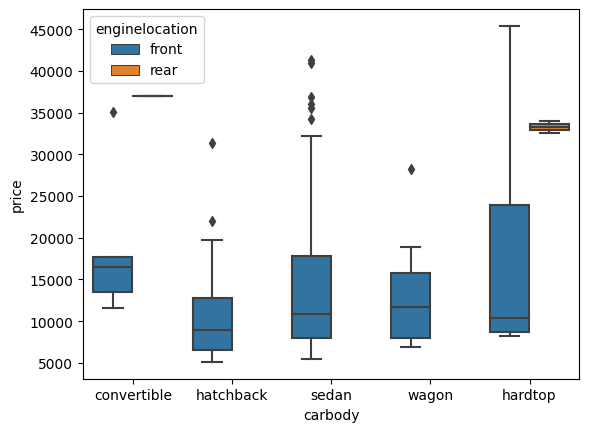

In [ ]:
# relationship between car body, enginelocation and price

sb.boxplot(x='carbody', y='price',hue='enginelocation', data=df)

<Axes: xlabel='carbody', ylabel='price'>

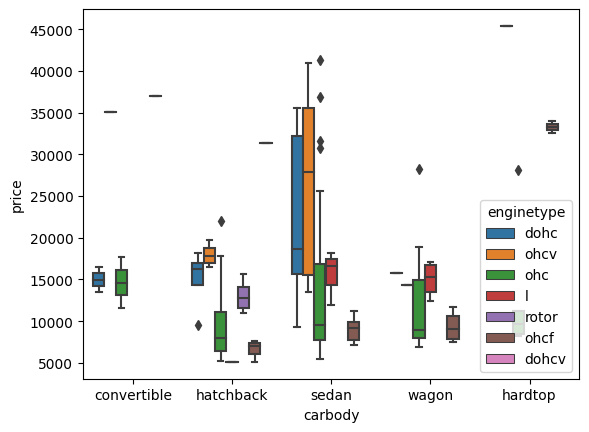

In [ ]:
# relationship between car body, enginetype and price

sb.boxplot(x='carbody', y='price',hue='enginetype', data=df)

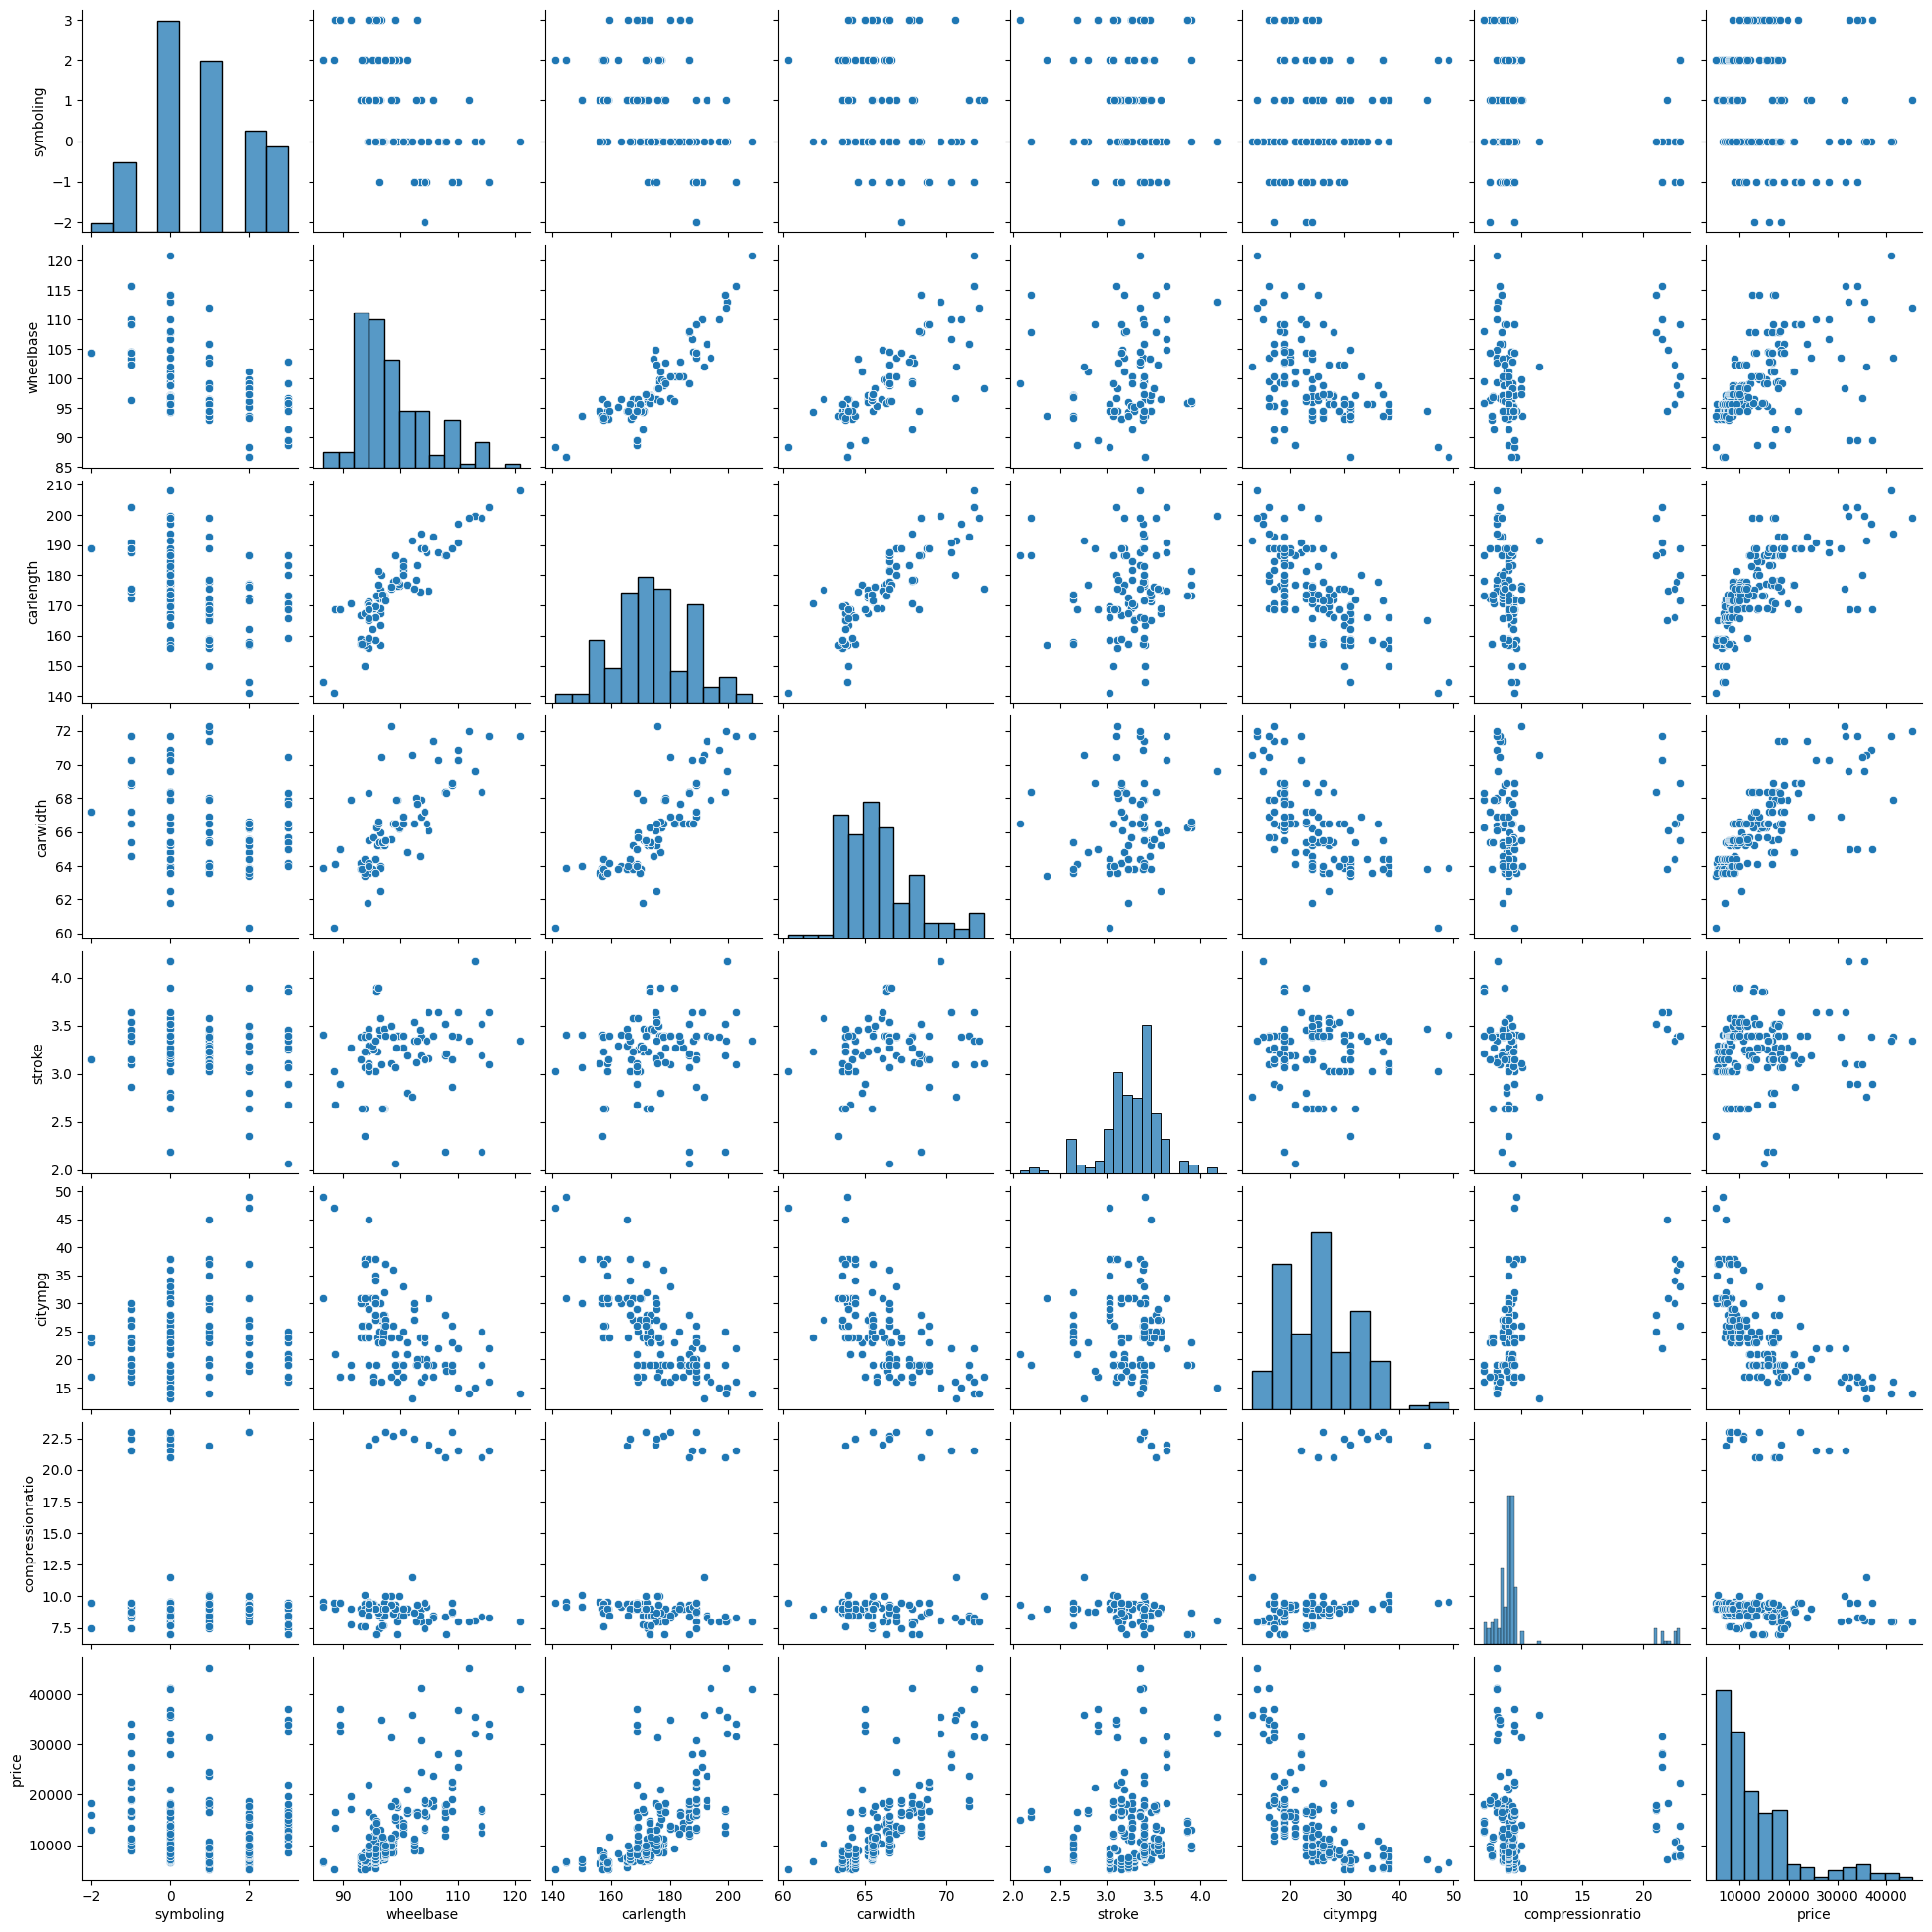

In [ ]:
var = ['symboling','wheelbase','carlength','carwidth','stroke','citympg','compressionratio','price']
sb.pairplot(df[var])

<Axes: >

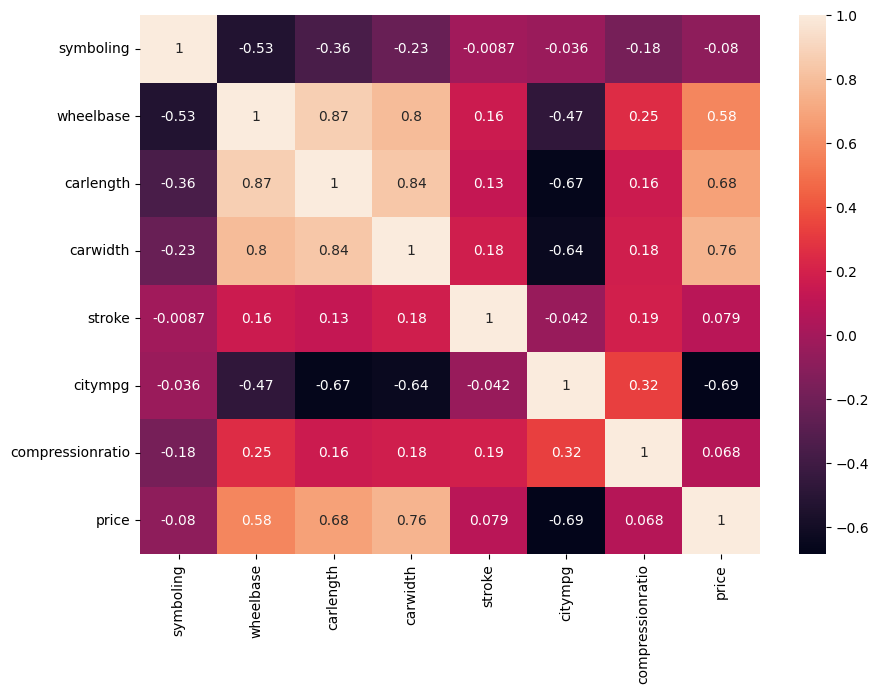

In [ ]:

var = ['symboling','wheelbase','carlength','carwidth','stroke','citympg','compressionratio','price']
plt.figure(figsize=(10,7))
sb.heatmap(df[var].corr(),annot=True)

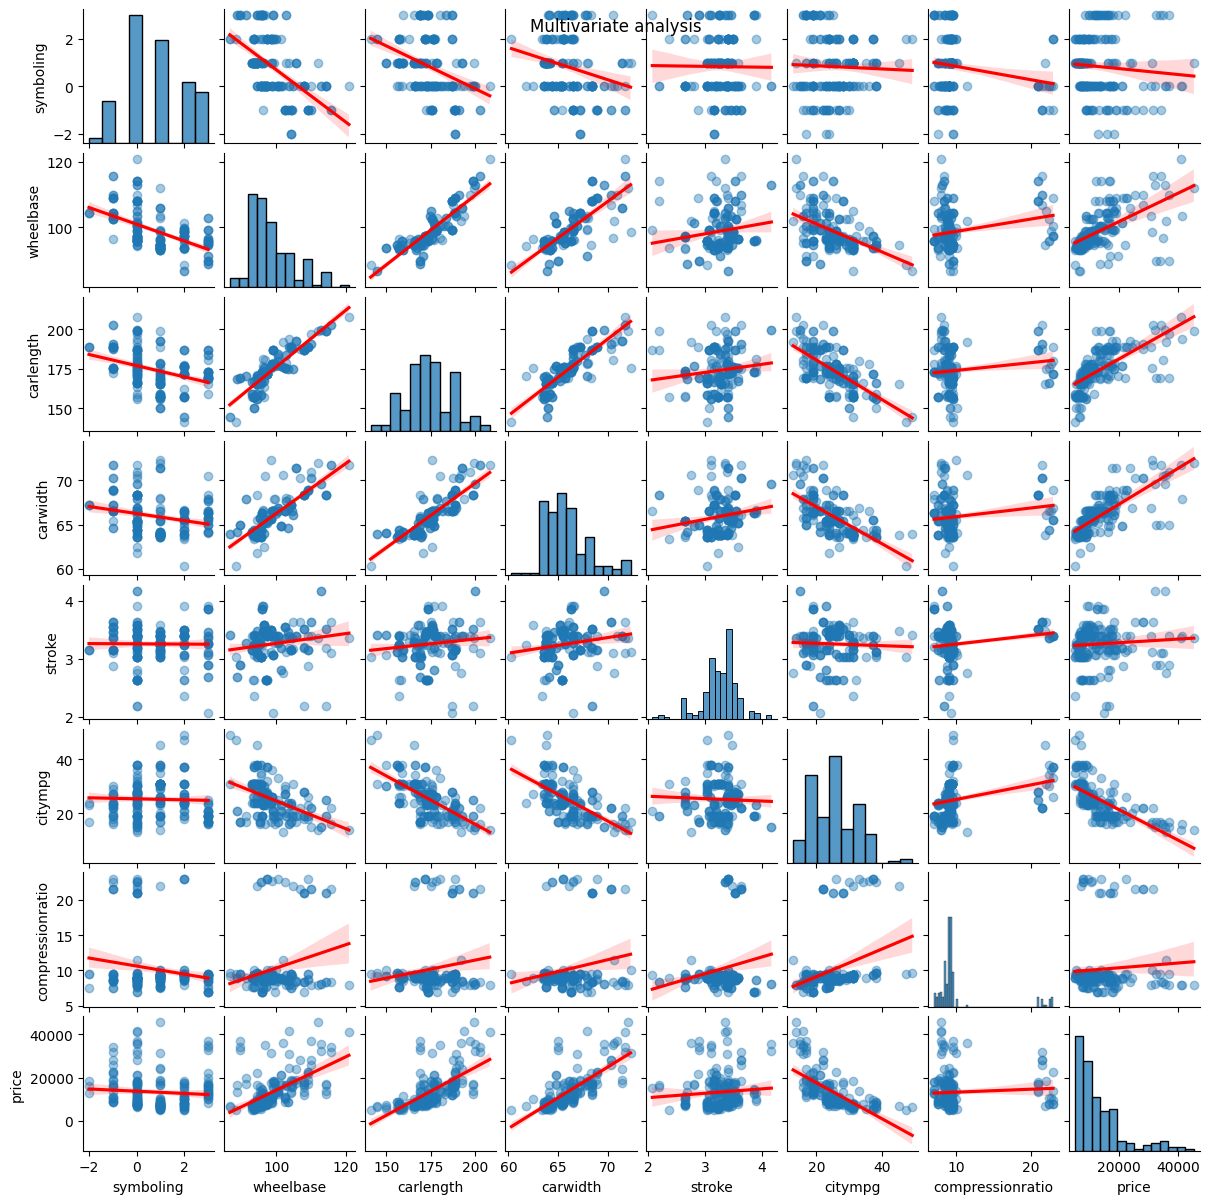

In [ ]:
g = sb.pairplot(df[var],kind='reg',plot_kws={'line_kws':{'color':'red'},'scatter_kws':{'alpha':0.4}})
g.fig.set_size_inches(12,12)
g.fig.suptitle('Multivariate analysis');

-From the exploration the carbody, enginetype, engineloaction, horsepower carlength, carwidth and citympg are observed to be good predictors pf a car price